# Getting income data from 5 year ACS
In this iPython notebook, we read in median income from the 5 2009-2013 American Community Survey 5-Year Estimates from the U.S. Census Bureau. Specifically, table B19013 "Median Household Income in the Past 12 Months (in 2013 Inflation-Adjusted Dollars)" by census tract.

In [39]:
import pandas as pd
import numpy as np
import re

def get_income_data():
    ## Read in median income data from census
    query = 'http://api.census.gov/data/2013/acs5?get=B19013_001E&for=tract:*&in=state:36'
    state_income_data = pd.read_csv('http://api.census.gov/data/2013/acs5?get=B19013_001E&for=tract:*&in=state:36', header=0)
    
    ##Clean the data    
    state_income_data.columns = ['Median_income','State', 'County', 'Tract','misread']
    state_income_data = state_income_data.drop('misread',axis=1)
    state_income_data['Median_income'] = state_income_data['Median_income'].map(lambda x: re.sub('[^\d]', "", x))
    state_income_data['Tract'] = state_income_data['Tract'].map(lambda x: re.sub('[^\d]', "", x))
    
    ##Select rows by census tract:
    nyc_counties = {'Bronx': 5, 'Kings': 47, 'New_York':61, 'Richmond': 81, 'Queens': 85}
    city_income_data = state_income_data[(state_income_data['County'].isin(nyc_counties.values()))]
    city_income_data['Median_income'] = city_income_data['Median_income'].map(lambda x: x if len(str(x)) >=1 else np.NaN)
    return city_income_data
                    

income_data = get_income_data()

income_data.head(6)

/Users/benjaminjakubowski/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Median_income,State,County,Tract
88,NaN,36,5,000100
89,69514,36,5,000200
90,73036,36,5,000400
91,30817,36,5,001600
92,33862,36,5,001900
93,19150,36,5,002000


 Now that we have the median income data by census tract, let's explore the distribution.

In [42]:
print income_data["Median_income"].isnull().sum()

58


In [46]:
not_null_income = income_data['Median_income'][~(income_data['Median_income'].isnull())]

In [47]:
print not_null_income.isnull().sum()

0


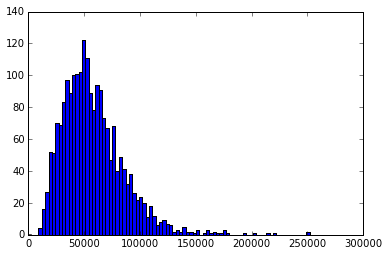

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

not_null_income = not_null_income.astype(int)
income_plot = plt.hist(not_null_income.values, bins=100, range=(0,300000))
plt.show(income_plot)